## SNR for NORAS coil
SNR assessment of NORAS neurosurgical coil. The acquisition is the default Siemens `sn` service sequence, with sum-of squares coil combination and preservation of individual coil element images. The acquisition as it stands overflows 12 bits so we have applied an ad hoc fft scale factor of 0.5 in the system tab. This is ignored in the analysis as it divides out when taking the ratio in the SNR.

The phantom is the Siemens 165mm sphere (2L), which is filled with an aqueous Nickel Sulphate solution.

The analysis calls for a circular region of interest in the phantom with an area of 220 cm<sup>2</sup> (practically the whole phantom) and a smaller background region with an area of 25 cm<sup>2</sup> located in the bottom right of the image. The same ROIs are used for all of the images. We construct them on the combined image.

The NORAS QA instructions define SNR reference values at 1.5T and 3T. These are included in the analysis.

In [1]:
from glob import glob
from os.path import join
import matplotlib.pyplot as plt
from pydicom import dcmread
from mriqa.reports.noras import noras_snr_report
from mriqa.dcmio import rx_coil_name

Get phantom images with appropriate sorting and filtering to limit to the ones we want. In practice, we could arrange for this to be simpler by limiting the acquisition to just what we need. 

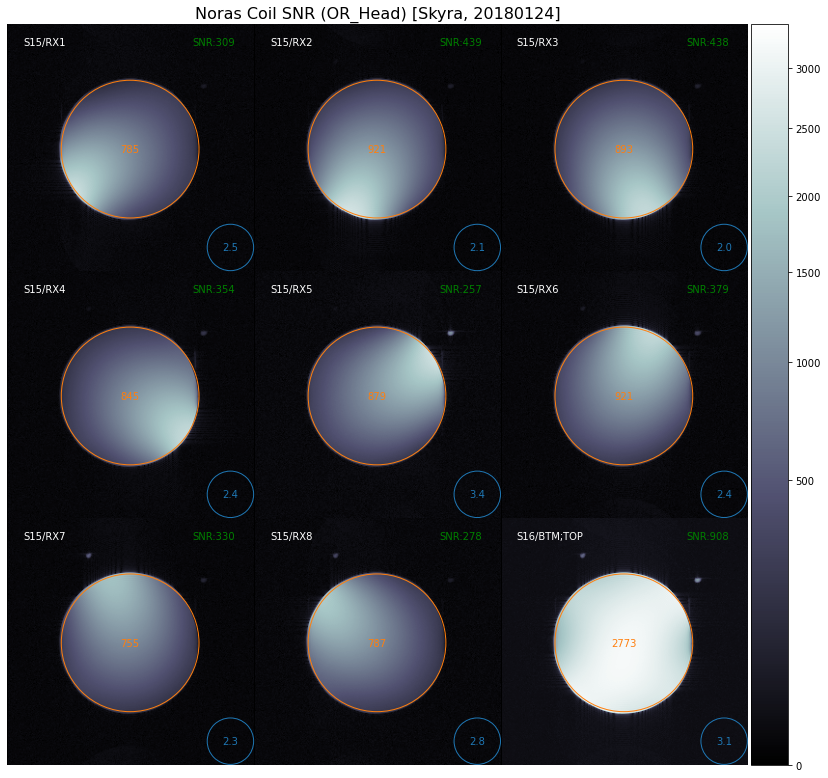

Signal     Noise         SNR  ReferenceLevel  Pass
Element                                                         
RX1       785.036015  2.538209  309.287396             220  True
RX2       920.624118  2.097275  438.962139             300  True
RX3       893.438674  2.038755  438.227659             300  True
RX4       844.921977  2.389222  353.638938             220  True
RX5       878.838150  3.419617  256.998993             220  True
RX6       920.968104  2.430021  378.995893             300  True
RX7       754.721054  2.286851  330.026284             300  True
RX8       787.055053  2.827278  278.379058             220  True
BTM;TOP  2772.776731  3.055004  907.617950             700  True

In [2]:
patid = 'PQA20180124NORAS'
stuid = '1'
per_element_series = 15
combined_series = 16
per_element_dir = '../../tests/test-data/noras/siemens/dicom/single'
combined_dir = '../../tests/test-data/noras/siemens/dicom/combined'

sort_key = lambda d: (int(d.SeriesNumber), int(d.AcquisitionNumber), int(d.EchoNumbers), rx_coil_name)

# Per element images
dobjs = sorted(
    [dcmread(f) for f in glob(join(per_element_dir, '*.dcm'))],
    key=sort_key
)
nelements = len(set(rx_coil_name(d) for d in dobjs))
single_element_objs = dobjs[:nelements]

# Sum-of-squares combined images
combined_obj = sorted(
    [dcmread(f) for f in glob(join(combined_dir, '*.dcm'))],
    key=sort_key
)[0]

result = noras_snr_report(single_element_objs, combined_obj)
plt.show()
result